In [1]:
from datasets import load_from_disk
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_from_disk("./data/train_dataset/")
train_dataset = dataset["train"]
valid_dataset = dataset["validation"]
test_dataset = load_from_disk("./data/test_dataset")["validation"]

In [3]:
train_df = pd.DataFrame(train_dataset)
train_df.head()

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548


In [4]:
valid_df = pd.DataFrame(valid_dataset)
valid_df.head()

,title,context,question,id,answers,document_id,__index_level_0__
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184


In [5]:
test_df = pd.DataFrame(test_dataset)
test_df.head()

,question,id
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              3952 non-null   object
 1   context            3952 non-null   object
 2   question           3952 non-null   object
 3   id                 3952 non-null   object
 4   answers            3952 non-null   object
 5   document_id        3952 non-null   int64 
 6   __index_level_0__  3952 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 216.2+ KB


In [7]:
train_df["__index_level_0__"].value_counts()

__index_level_0__
163     2
285     2
42      2
1177    2
471     2
       ..
1308    1
1699    1
290     1
3329    1
2474    1
Name: count, Length: 3120, dtype: int64

In [12]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              240 non-null    object
 1   context            240 non-null    object
 2   question           240 non-null    object
 3   id                 240 non-null    object
 4   answers            240 non-null    object
 5   document_id        240 non-null    int64 
 6   __index_level_0__  240 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 13.2+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  600 non-null    object
 1   id        600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


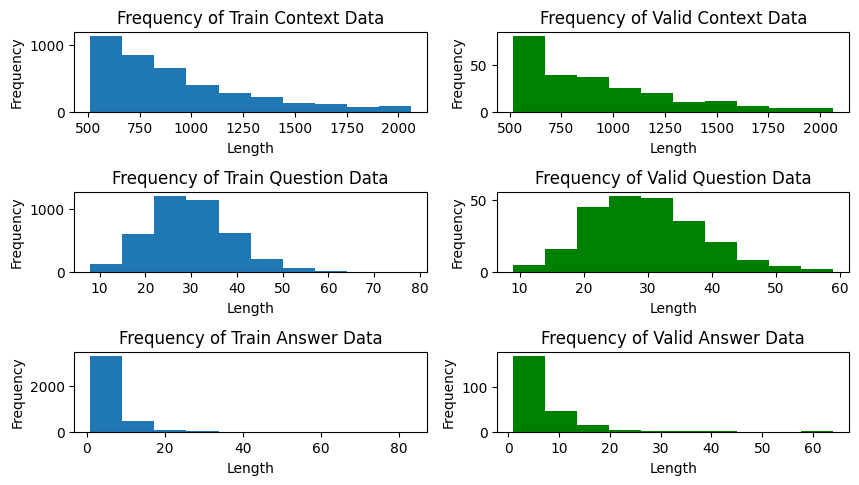

In [13]:
plt.figure(figsize = (10, 5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

plt.subplot(3,2,1)
plt.hist(train_df['context'].apply(lambda x: len(x)))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Context Data")

plt.subplot(3,2,2)
plt.hist(valid_df["context"].apply(lambda x: len(x)), color = "green")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Valid Context Data")

plt.subplot(3,2,3)
plt.hist(train_df["question"].apply(lambda x: len(x)))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Question Data")

plt.subplot(3,2,4)
plt.hist(valid_df["question"].apply(lambda x: len(x)), color = "green")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Valid Question Data")

plt.subplot(3,2,5)
plt.hist([len(train_df['answers'][i]['text'][0]) for i in range(len(train_df))])
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Answer Data")

plt.subplot(3,2,6)
plt.hist([len(valid_df['answers'][i]['text'][0]) for i in range(len(valid_df))], color = "green")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Valid Answer Data")

plt.show()

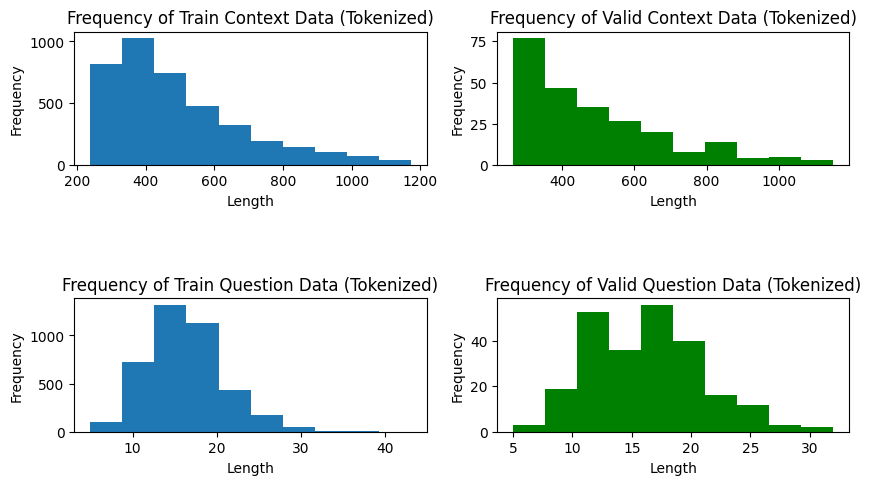

In [14]:
tokenizer = BertTokenizer.from_pretrained("klue/bert-base")

plt.figure(figsize = (10, 5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

plt.subplot(2,2,1)
plt.hist(train_df['context'].apply(lambda x: len(tokenizer.tokenize(x))))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Context Data (Tokenized)")

plt.subplot(2,2,2)
plt.hist(valid_df['context'].apply(lambda x: len(tokenizer.tokenize(x))), color = "green")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Valid Context Data (Tokenized)")

plt.subplot(2,2,3)
plt.hist(train_df['question'].apply(lambda x: len(tokenizer.tokenize(x))))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Question Data (Tokenized)")

plt.subplot(2,2,4)
plt.hist(valid_df['question'].apply(lambda x: len(tokenizer.tokenize(x))), color = "green")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Valid Question Data (Tokenized)")

plt.show()


In [5]:
idx_train_list = []
idx_valid_list = []
duple_list = []
for context in list(valid_df["context"]):
    if context in list(train_df["context"]):
        duple_list.append(context)
        idx_train_list.append(list(train_df["context"]).index(context))
        idx_valid_list.append(list(valid_df["context"]).index(context))

In [6]:
print(len(duple_list))
print(len(list(set(duple_list))))

73
71


In [7]:
train_df.iloc[idx_train_list].sort_values("context").head(5)

,title,context,question,id,answers,document_id,__index_level_0__
1025,댈러스,1839년 귀국 후 댈러스는 제임스 뷰캐넌이 거부한 후 법무장관 직이 제공되었으나 ...,댈러스 이전에 부통령직 지위를 제안받은 인물은 누구인가요?,mrc-0-004018,"{'answer_start': [324], 'text': ['사일러스 라이트']}",27402,2633
3941,와카바야시 다다시,1927년 고등학교 학생의 신분으로 실업 팀에 선발되어 친선 경기를 위해 일본을 방...,와카바야시의 추계 리그 3번째 우승은 몇 년인가?,mrc-0-005013,"{'answer_start': [764], 'text': ['1934년']}",36586,3257
82,나치 독일,1941년 6월 22일에는 독일이 독소불가침 조약을 깨고 380만 명의 추축국 군대...,독일의 바르바로사 작전은 어느 국가를 대상으로 한 것이었나?,mrc-0-001610,"{'answer_start': [53], 'text': ['소련']}",7907,1052
984,이흥구,1989년 동유럽 사회주의 체제의 붕괴 이후 운동진영에 급진적 사회변혁 대신 체제 ...,김원치 검사와 이흥구가 재회하여 이야기를 나누었던 시간은?,mrc-1-000261,"{'answer_start': [395], 'text': ['20여분']}",57479,170
2222,공각기동대 (만화),2029년의 지구는 비약적으로 발달한 기술 문명을 바탕으로 전 세계가 전자 통신망으...,인형사를 탄생시킨 것으로 추정되는 정부 기관은?,mrc-1-000469,"{'answer_start': [998], 'text': ['공안 6과']}",8777,303


In [8]:
valid_df.iloc[idx_valid_list].sort_values("context").head(5)

,title,context,question,id,answers,document_id,__index_level_0__
105,댈러스,1839년 귀국 후 댈러스는 제임스 뷰캐넌이 거부한 후 법무장관 직이 제공되었으나 ...,댈러스 이전에 법무장관 직을 거부한 인물은 어디 출신인가요?,mrc-0-002471,"{'answer_start': [75], 'text': ['펜실베이니아주 출신']}",27402,1617
80,와카바야시 다다시,1927년 고등학교 학생의 신분으로 실업 팀에 선발되어 친선 경기를 위해 일본을 방...,일본 프로 야구에서 처음으로 가쿠사다마를 사용한 선수는?,mrc-0-001704,"{'answer_start': [1013], 'text': ['가리타 히사노리']}",36586,1115
118,나치 독일,1941년 6월 22일에는 독일이 독소불가침 조약을 깨고 380만 명의 추축국 군대...,러시아에 있는 다량의 천연자원을 약탈하려했던 계획은?,mrc-0-004202,"{'answer_start': [67], 'text': ['바르바로사 작전']}",7907,2752
17,이흥구,1989년 동유럽 사회주의 체제의 붕괴 이후 운동진영에 급진적 사회변혁 대신 체제 ...,이흥구의 사법시험 이야기를 기사로 작성한 곳은?,mrc-0-003727,"{'answer_start': [709], 'text': ['〈중앙일보〉']}",57479,2450
11,공각기동대 (만화),2029년의 지구는 비약적으로 발달한 기술 문명을 바탕으로 전 세계가 전자 통신망으...,인형사'를 만들어낸 것으로 추측되는 사업의 이름은?,mrc-0-003931,"{'answer_start': [901], 'text': [''일급 비밀 프로젝트 ...",8777,2580


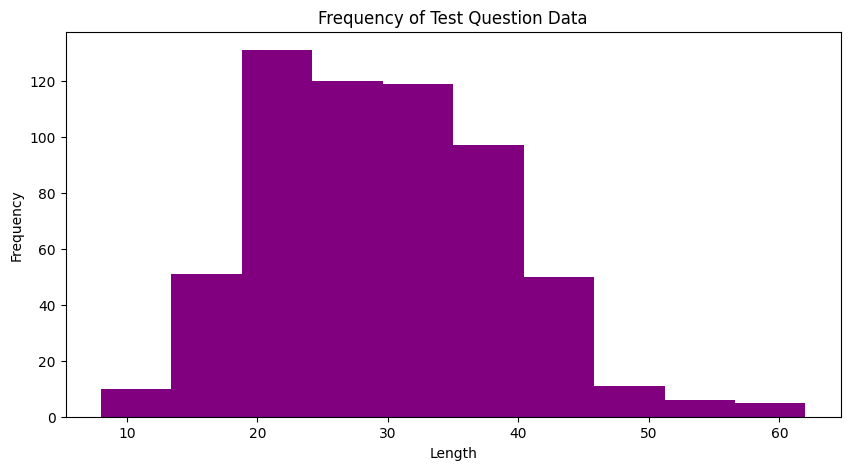

In [19]:
plt.figure(figsize=(10, 5))

plt.hist(test_df["question"].apply(lambda x: len(x)), color = "purple")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Test Question Data")

plt.show()

In [25]:
print(train_df['context'].nunique())
print(train_df['question'].nunique())
print(valid_df['context'].nunique())
print(valid_df['question'].nunique())
print(test_df['question'].nunique())

3340
3952
235
240
600


---

In [3]:
import json
import pandas as pd
import re
import random

In [2]:
wiki_df = pd.read_json("./data/wikipedia_documents.json").transpose()
wiki_df.head()

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4


In [11]:
wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60613 entries, 0 to 60612
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           60613 non-null  object
 1   corpus_source  60613 non-null  object
 2   url            4554 non-null   object
 3   domain         0 non-null      object
 4   title          60613 non-null  object
 5   author         0 non-null      object
 6   html           0 non-null      object
 7   document_id    60613 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


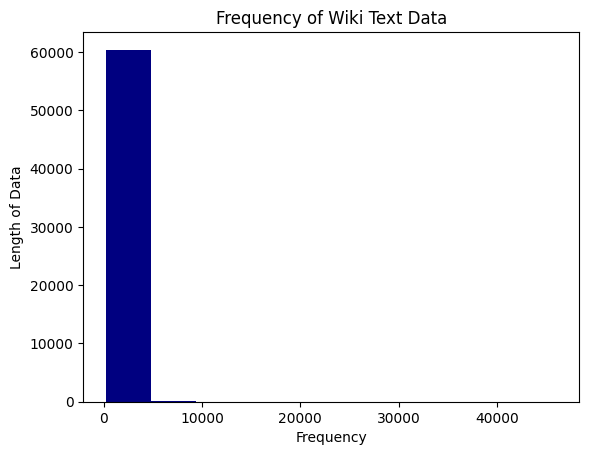

In [20]:
plt.hist(wiki_df["text"].apply(lambda x: len(x)), color = "navy")
plt.xlabel("Frequency")
plt.ylabel("Length of Data")
plt.title("Frequency of Wiki Text Data")
plt.show()

In [22]:
wiki_df["text"].apply(lambda x: len(x)).describe(include = "O")

count    60613.000000
mean       755.565044
std        762.962671
min        184.000000
25%        414.000000
50%        577.000000
75%        857.000000
max      46099.000000
Name: text, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f276fb20550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f276fb200a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f276fb21c60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f276fb23700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f276e6acf10>],
 'means': []}

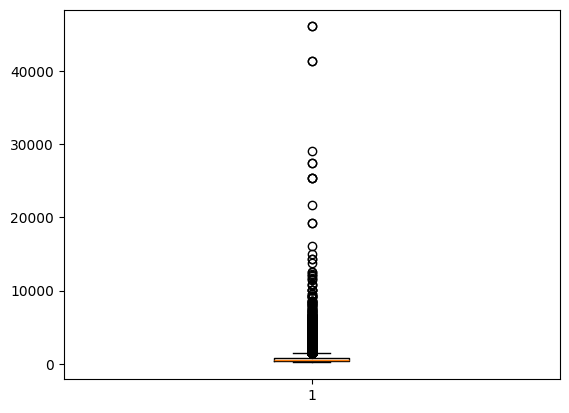

In [35]:
plt.boxplot(wiki_df["text"].apply(lambda x: len(x)))

In [7]:
wiki_df.nunique()

text             56737
corpus_source        1
url                  1
domain               0
title            31755
author               0
html                 0
document_id      60613
dtype: int64

In [28]:
wiki_df.groupby("title").filter(lambda x: x["text"].nunique() > 1)

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4
5,아오조라 문고는 자원봉사로 운영되며 열람 역시 무료이다. 서비스 개시 초반에는 보...,위키피디아,TODO,None,아오조라 문고,None,None,5
...,...,...,...,...,...,...,...,...
60608,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60608
60609,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60609
60610,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60610
60611,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,None,None,단결권 및 단체교섭권 협약,None,None,60611


In [25]:
wiki_df[wiki_df[["text"]].duplicated(keep = False)].sort_values("text")

,text,corpus_source,url,domain,title,author,html,document_id
3859,"""Robots.txt""는 이 문서를 가리킵니다. 위키백과의 Robots.txt의 파...",위키피디아,TODO,None,로봇 배제 표준,None,None,3859
8413,"""Robots.txt""는 이 문서를 가리킵니다. 위키백과의 Robots.txt의 파...",위키피디아,None,None,로봇 배제 표준,None,None,8413
6873,"""들어오지 못하게, 나가지 못하게, 나가도 쓰지 못하게”라는 삼성SDS 고유의 보안...",위키피디아,None,None,삼성SDS,None,None,6873
2319,"""들어오지 못하게, 나가지 못하게, 나가도 쓰지 못하게”라는 삼성SDS 고유의 보안...",위키피디아,TODO,None,삼성SDS,None,None,2319
3744,"""아미타불""이라는 낱말은 무량광(無量光: 헤아릴 수 없는 광명을 가진 것)의 뜻인 ...",위키피디아,TODO,None,아미타불,None,None,3744
...,...,...,...,...,...,...,...,...
6497,"힌디어(हिन्दी, Hindi)는 인도유럽어족의 인도이란어파에 속하는 언어로, 영...",위키피디아,None,None,힌디어,None,None,6497
7107,"힘이 물체의 운동 방향으로 작용하면, 물체의 운동량이 증가하고 힘이 일을 하므로 에...",위키피디아,None,None,질량-에너지 등가,None,None,7107
2553,"힘이 물체의 운동 방향으로 작용하면, 물체의 운동량이 증가하고 힘이 일을 하므로 에...",위키피디아,TODO,None,질량-에너지 등가,None,None,2553
9096,"치 셰미니 례예 낫재라.\n\n○ 子思子曰, 天命之謂性, 率性之謂道, 修道...",위키피디아,None,None,소학언해,None,None,9096


In [29]:
duplicate_texts = wiki_df[wiki_df["text"].duplicated(keep=False)]
different_titles = duplicate_texts.groupby("text").filter(lambda x: x["title"].nunique() > 1)
different_titles.sort_values("text")

,text,corpus_source,url,domain,title,author,html,document_id
49841,"10대 닥터\n \n*TARDISODE 8\n*""The beast and his a...",위키피디아,None,None,The Satan Pit,None,None,49841
49786,"10대 닥터\n \n*TARDISODE 8\n*""The beast and his a...",위키피디아,None,None,The Impossible Planet,None,None,49786
1213,19세기 말부터 러시아의 진보적 귀족과 러시아 농촌 내 농민에게서 자생적으로 발생한...,위키피디아,TODO,None,레닌주의,None,None,1213
5767,19세기 말부터 러시아의 진보적 귀족과 러시아 농촌 내 농민에게서 자생적으로 발생한...,위키피디아,None,None,레닌주의,None,None,5767
60263,19세기 말부터 러시아의 진보적 귀족과 러시아 농촌 내 농민에게서 자생적으로 발생한...,위키피디아,None,None,노농동맹,None,None,60263
...,...,...,...,...,...,...,...,...
54994,"팀들은 승점 순으로 정렬된다.(승리시 3점, 무승부시 1점, 패배시 0점), 승점 ...",위키피디아,None,None,2019-20년 UEFA 유로파리그 조별 리그,None,None,54994
42932,파일:Pierre Trudeau (1975).jpg|캐나다 캐나다<br />피에르 ...,위키피디아,None,None,제3회 G7 정상회담,None,None,42932
42937,파일:Pierre Trudeau (1975).jpg|캐나다 캐나다<br />피에르 ...,위키피디아,None,None,제4회 G7 정상회담,None,None,42937
56987,한산도함은 국내 군함 중 최대 규모의 의무실과 병상을 갖췄다. 독도함의 1.8배의 ...,위키피디아,None,None,비전쟁군사행동,None,None,56987


In [12]:
def check_newlines(text):
    # 개행 문자 (줄바꿈, 탭 등)가 있는지 확인
    return bool(re.search(r"[\n\r\t]", text))

def check_multiple_spaces(text):
    # 연속된 공백 (2개 이상의 공백)이 있는지 확인
    return bool(re.search(r"\s{2,}", text))

# 데이터에 적용하여 각각의 결과를 확인
wiki_df["has_newlines"] = wiki_df["text"].apply(check_newlines)  # 개행 문자 확인
wiki_df["has_multiple_spaces"] = wiki_df["text"].apply(check_multiple_spaces)  # 연속된 공백 확인

# 각 컬럼의 값이 True인지 False인지 확인
print("개행 문자가 있는지 여부:\n", wiki_df["has_newlines"].value_counts())
print("\n연속된 공백이 있는지 여부:\n", wiki_df["has_multiple_spaces"].value_counts())

개행 문자가 있는지 여부:
 has_newlines
True     46230
False    14383
Name: count, dtype: int64

연속된 공백이 있는지 여부:
 has_multiple_spaces
True     47001
False    13612
Name: count, dtype: int64


In [ ]:
pd.set_option("display.max_colwidth", None)

In [22]:
wiki_df[wiki_df["has_newlines"] == True].sample(n = 2, random_state = 42)

,text,corpus_source,url,domain,title,author,html,document_id,has_newlines,has_multiple_spaces,has_special_characters
20157,uSTR+l|uABZgr|||↓ 공항선]] - 하카타}}\nO1=HUBaq|uBHF|O2=HUBeq|0.0|나카스카와바타|\n0.5|고후쿠마치|\n|uWTUNNEL||미카사 강|\n|uBHF|1.2|지요 현청 입구|\n|uBHF|2.1|마이다시 규다이 병원 앞|\n|uBHF|2.9|하코자키미야마에|\n|uBHF|3.7|하코자키 규다이 앞|\n|uWECHSEL||\n|KBHFe|O2=HUBa|4.7|가이즈카|\n|KBHFa|O2=HUBe|||↓ 서일본 철도 가이즈카 선\n|LSTR|||니시테쓰 신구 행\n}}\n후쿠오카 시 교통국 지하철 하코자키 선(福岡市地下鉄箱崎線)은 후쿠오카 시 교통국의 지하철 노선 가운데 하나이다. 후쿠오카현 후쿠오카시 하카타구에 위치한나카스카와바타 역과 히가시구에 위치한 가이즈카 역을 잇는다.,위키피디아,None,None,후쿠오카 시 지하철 하코자키 선,None,None,20157,True,False,True
8053,"지르코늄 동위 원소\n지르코늄은 자연에서 다섯 종류의 동위 원소가 존재한다. 이들 중 Zr, Zr, Zr은 안정하며, Zr은 이들 중 존재 비율이 51.45%로 가장 높다. Zr은 1.10×10년 이상의 반감기를 거쳐 이중 베타 붕괴한다. Zr은 2.4×10년 이상의 반감기를 거쳐 붕괴하며, 지르코늄의 방사성 동위 원소 중 가장 긴 반감기를 가지므로 사실상 안정한 동위 원소로 분류되기도 한다. 이들 외에 원자량 78에서 110 사이에 총 28종류의 지르코늄 동위 원소가 인공적으로 합성되었으며, 이들 중 반감기가 가장 긴 것은 Zr로 반감기가 1.53×10년이다. 다섯 종류의 준안정한 동위 원소도 관찰되었다.",위키피디아,None,None,지르코늄,None,None,8053,True,False,True


In [23]:
wiki_df[wiki_df["has_multiple_spaces"] == True].sample(n = 2, random_state = 42)

,text,corpus_source,url,domain,title,author,html,document_id,has_newlines,has_multiple_spaces,has_special_characters
31461,"현대사회에서 상류층(上流層)은 주로 부(富)·권력(權力)·위신(威信) 등 가치서열에서 상위에 위치하는 사회적 특권집단이다. 대자본가·경영자·장군·고급 관리·변호사·의사·교수·정치인·각료 등 지체 높은 자가 대개 이 층에 속한다. \n\n이들은 일반적으로 명문 출신이고, 존경과 선망의 대상이며, 생활환경이 좋고 교양, 예의와 문화를 중시한다. 이들의 사고방식 및 생활양식은 보수적이며 전통을 중시한다. 그러나 단시일에 상류계층으로 상승한 사람들은 상류층 특유의 행동양식·전통을 가지지 못한 대신에 소비형태에서 과시적 소비를 하여 의도적으로 상류층의 성원임을 돋보이게 하고 타인의 선망을 받으려 한다. 특히 이들 상류층이 그들의 경제적 기반인 물질적 재화(財貨)보다 정신적·미적·지적 대상을 더욱 고귀한 것으로 간주하고 비생산적인 방식으로 여가를 즐김으로써 그들의 높은 위치를 과시하려 할 때 그것은 유한계급이 된다",위키피디아,None,None,상류층,None,None,31461,True,True,True
7276,"블루스크린(blue screen of death|블루 스크린 오브 데스, 줄여서(BSOD))은 마이크로소프트 윈도우 운영체제에서 시스템 오류를 복구하지 못할 때 나타나는 화면을 뜻한다. 이 화면은 윈도우 1.0부터 존재했고, 특히 9x 계열(95, 98, me)에 비해 윈도우 NT 계열이 비교적 자세한 오류 메시지를 출력한다.\n\n윈도우 비스타(당시 코드명 롱혼)의 초기 버전(빌드 4096 이하)은 부트 로더 오류가 났을 때 빨간 화면이 나타났었다. 윈도우 98에서는 실행 창에 C:\CON\CON을 입력하여 볼 수 있다. 윈도 NT 계열의 윈도우에서는 smss.exe나 svchost.exe를 종료시키면 볼 수 있다. \n\n블루스크린은 기본적으로 파란 배경 화면(EGA : 0x01; HTML : #0000AA)에 하얀색 글자(EGA : 0x0F; HTML : #FFFFFF)로 오류 내용을 표시한다. 윈도 95, 98 그리고 Me 는 80x25 텍스트 모드에 픽스트시스 폰트를 사용한다. NT는 80x50 텍스트 모드에 화면 해상도는 720x400이다. XP는 루시다 콘솔 폰트를 사용한다.",위키피디아,None,None,블루스크린,None,None,7276,True,True,True
